In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [136]:
data = pd.read_csv("employee.csv",index_col=[0])
data.head()
df = data.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POSITION_TITLE     2000 non-null   object 
 1   DEPARTMENT         2000 non-null   object 
 2   BASE_SALARY        1886 non-null   float64
 3   RACE               1965 non-null   object 
 4   EMPLOYMENT_TYPE    2000 non-null   object 
 5   GENDER             2000 non-null   object 
 6   EMPLOYMENT_STATUS  2000 non-null   object 
 7   HIRE_DATE          2000 non-null   object 
 8   JOB_DATE           1997 non-null   object 
dtypes: float64(1), object(8)
memory usage: 156.2+ KB


In [20]:
df.isnull().sum()

POSITION_TITLE         0
DEPARTMENT             0
BASE_SALARY          114
RACE                  35
EMPLOYMENT_TYPE        0
GENDER                 0
EMPLOYMENT_STATUS      0
HIRE_DATE              0
JOB_DATE               3
dtype: int64

In [32]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()!=0 ]
feature_with_na

['BASE_SALARY', 'RACE', 'JOB_DATE']

In [37]:
df['BASE_SALARY'].isnull().sum()/len(df['BASE_SALARY'])

0.057

In [79]:
for missing_feature in feature_with_na:
    print(missing_feature,np.round((df[missing_feature].isnull().sum()/len(df[missing_feature]))*100,4)," % missing value")

BASE_SALARY 5.7  % missing value
RACE 1.75  % missing value
JOB_DATE 0.15  % missing value


In [86]:
df['RACE'].isnull().sum()/len(df['RACE'])*100

1.7500000000000002

# Conclusion
- Almost missing feature , its better to come with best value to replace

In [ ]:
# Categorizing 

In [106]:
numeric_features=[feature for feature in df.columns if df[feature].dtypes!='O' ]
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O' ]
categorical_feature

['POSITION_TITLE',
 'DEPARTMENT',
 'RACE',
 'EMPLOYMENT_TYPE',
 'GENDER',
 'EMPLOYMENT_STATUS',
 'JOB_DATE']

RACE
Black or African American            700
White                                665
Hispanic/Latino                      480
Asian/Pacific Islander               107
American Indian or Alaskan Native     11
Others                                 2
Name: count, dtype: int64


<Axes: xlabel='GENDER', ylabel='BASE_SALARY'>

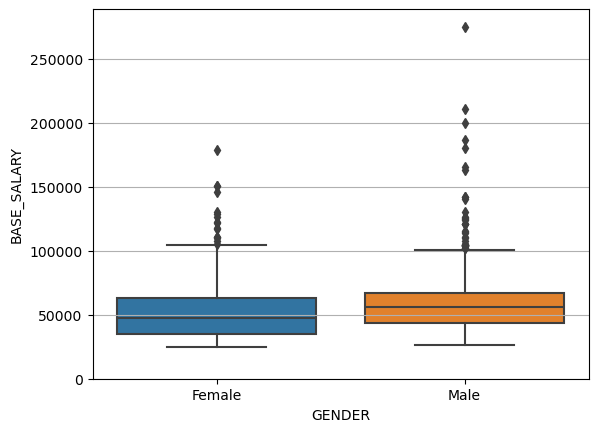

In [100]:
# Handle missing values
df['BASE_SALARY'].fillna(df['BASE_SALARY'].mean(), inplace=True)  # impute with mean

# Convert date columns to datetime
df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'])

# Univariate analysis
print(df['RACE'].value_counts())  # categorical
df['BASE_SALARY'].hist()  # numerical

# Bivariate analysis
pd.crosstab(df['GENDER'], df['DEPARTMENT'])  # categorical-categorical
sns.boxplot(x=df['GENDER'], y=df['BASE_SALARY'])  # categorical-numerical

<Axes: >

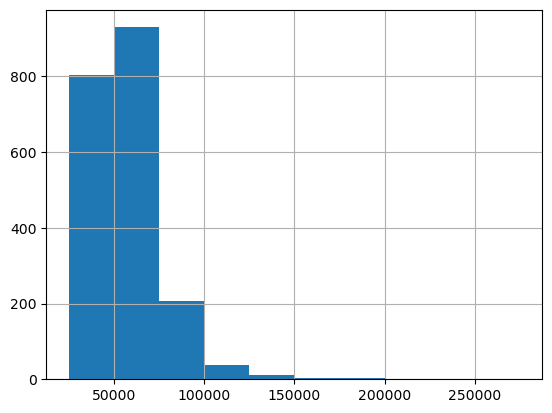

In [102]:
df['BASE_SALARY'].hist()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='EMPLOYMENT_TYPE', ylabel='Count'>

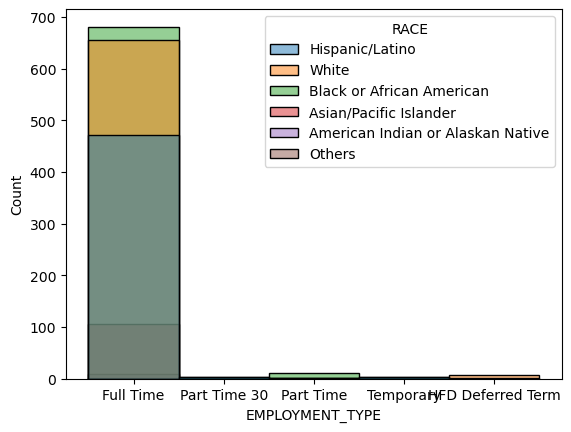

In [124]:
sns.histplot(df,x='EMPLOYMENT_TYPE',hue='RACE',bins=50)

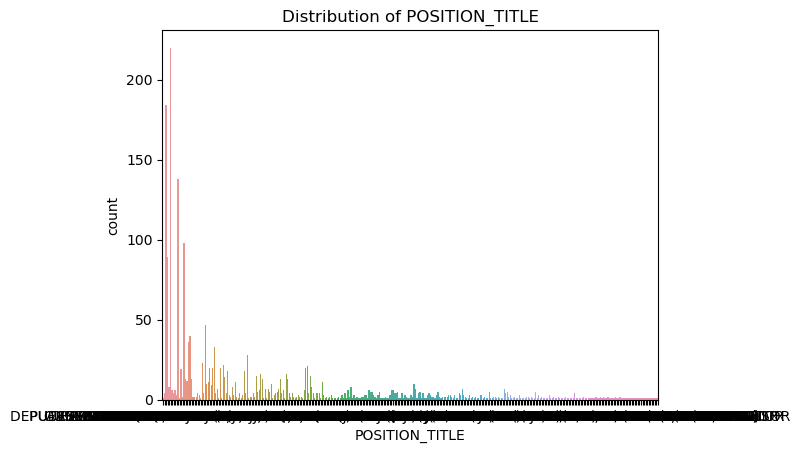

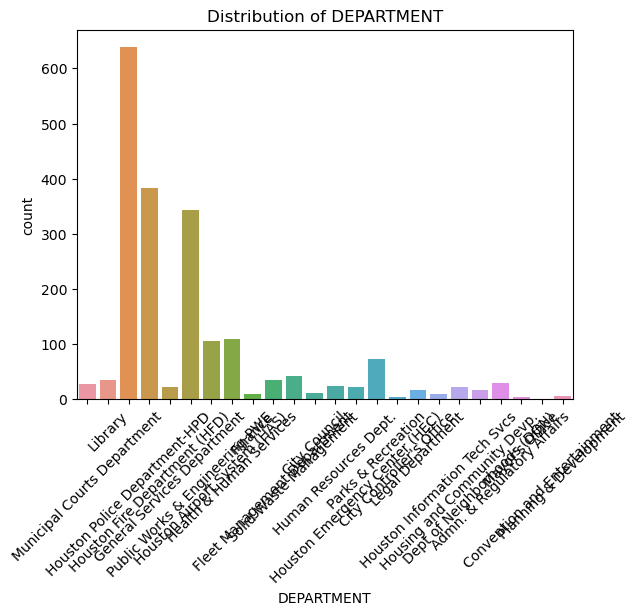

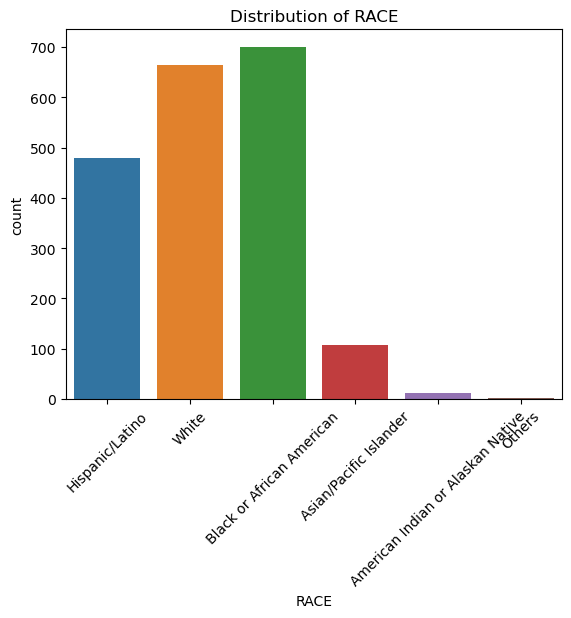

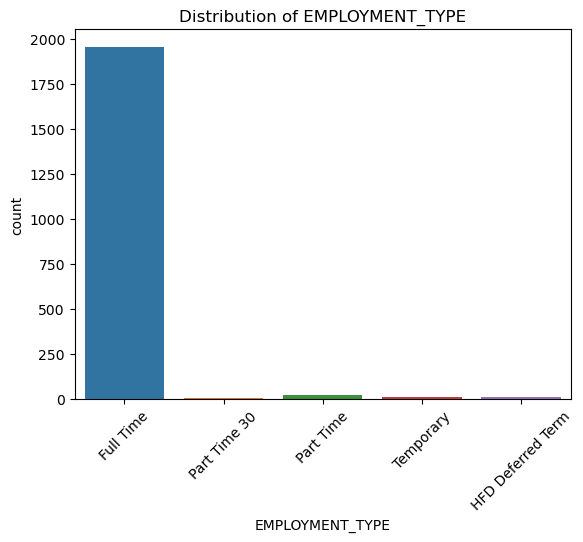

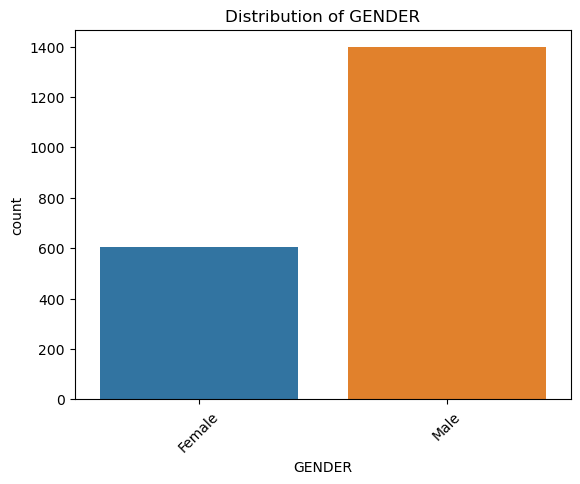

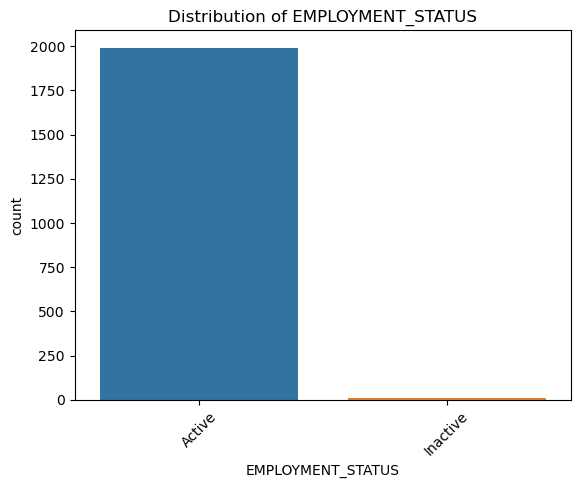

In [ ]:
for feature in categorical_feature:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()
    plt.xticks(rotation = 45)